# Spheroid echo spectra

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

In [2]:
from pp_utils.core import generate_data_path_dict
from pp_utils import inspection_angle as ia

## Set up paths

In [3]:
data_path = generate_data_path_dict(Path("../data_processed/"))
raw_path = Path("../data_raw/")

### Data and output path

In [4]:
fig_path = Path("../figs")
if not fig_path.exists():
    fig_path.mkdir()

In [8]:
spheroid_echo_path = data_path["main"] / "spheroid_echoes/202307"
spheroid_echo_files = {
    "1.0": "ar1.0_TS.nc",
    "1.1": "ar1.1_TS.nc",
    "1.3": "ar1.3_TS.nc",
    "2.9": "ar2.9_TS.nc",
}

## Load TS data

In [10]:
echo10 = ia.get_spheroid_echo(
    sph_echo_angle=np.arange(0, 105, 15), sph_ar="1.0",
    sph_path=spheroid_echo_path, sph_file=spheroid_echo_files
)
echo11 = ia.get_spheroid_echo(
    sph_echo_angle=np.arange(0, 105, 15), sph_ar="1.1",
    sph_path=spheroid_echo_path, sph_file=spheroid_echo_files
)
echo13 = ia.get_spheroid_echo(
    sph_echo_angle=np.arange(0, 105, 15), sph_ar="1.3",
    sph_path=spheroid_echo_path, sph_file=spheroid_echo_files
)
echo29 = ia.get_spheroid_echo(
    sph_echo_angle=np.arange(0, 105, 15), sph_ar="2.9",
    sph_path=spheroid_echo_path, sph_file=spheroid_echo_files
)

In [11]:
echo10

<xarray.DataArray 'TS' (angle: 7, frequency: 512)>
[3584 values with dtype=float64]
Coordinates:
  * frequency  (frequency) float64 0.0 488.3 976.6 ... 2.49e+05 2.495e+05
  * angle      (angle) int32 0 15 30 45 60 75 90

In [12]:
# Get the max and min vertical (angle) extent for imshow
angle_delta = echo10["angle"].data[1] - echo10["angle"].data[0]
angle = -angle_delta/2, angle_delta*(echo10.shape[0]-1) + angle_delta/2
angle

(-7.5, 97.5)

In [13]:
# Get the max and min horizontal (frequency) extent for imshow
freq = echo10["frequency"].values[[0, -1]]
freq

array([     0.     , 249511.71875])

## Plot

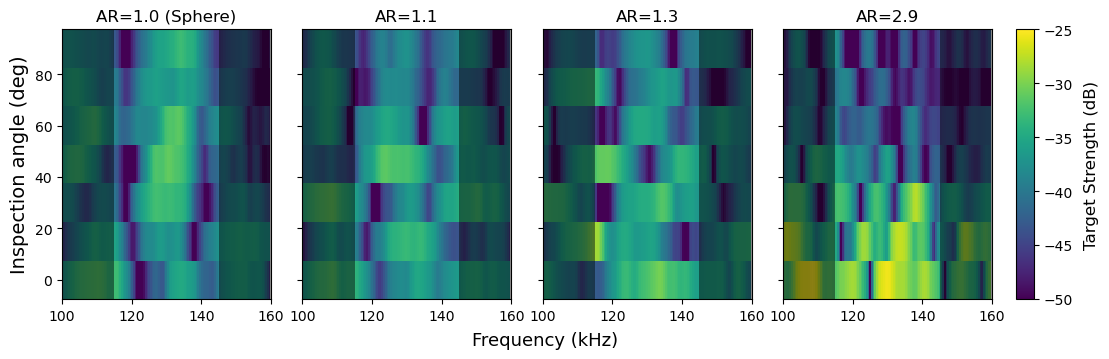

In [14]:
im = []
cax = []
vmin = -50
vmax = -25
cmap = "viridis"

fig, ax = plt.subplots(1, 4, figsize=(12, 3.5), sharey=True)
fig.subplots_adjust(wspace=0.15)

for seq_ar, echo_ar in enumerate([echo10, echo11, echo13, echo29]):
    im_tmp = ax[seq_ar].imshow(
        echo_ar, aspect="auto", interpolation="none",
        extent=(freq[0], freq[1]/1e3, angle[1], angle[0]),  # note inverted Y
        vmin=vmin, vmax=vmax, cmap=cmap
    )
    im.append(im_tmp)
    
for axx in ax:
    axx.set_xlim(100, 160)
    axx.set_ylim(angle[0], angle[1])
    axx.fill_betweenx(y=np.arange(-10, 100), x1=0, x2=115, facecolor="k", alpha=0.45)
    axx.fill_betweenx(y=np.arange(-10, 100), x1=145, x2=200, facecolor="k", alpha=0.45)

ax_pos = ax[3].get_position()
cax = plt.axes([ax_pos.x0+ax_pos.width+0.02, ax_pos.y0, 0.015, ax_pos.height])
cbar = plt.colorbar(im[2], cax=cax, orientation="vertical")
cbar.ax.set_ylabel("Target Strength (dB)", fontsize=12, labelpad=8)
    
ax[0].set_title("AR=1.0 (Sphere)", fontsize=12)
ax[1].set_title("AR=1.1", fontsize=12)
ax[2].set_title("AR=1.3", fontsize=12)
ax[3].set_title("AR=2.9", fontsize=12)
ax[0].set_ylabel("Inspection angle (deg)", fontsize=14)
ax[1].set_xlabel(
    "                                                Frequency (kHz)",
    fontsize=13, labelpad=6
)

plt.show()

fig.savefig(fig_path / "fig_echo_spectra_all.png", dpi=300, bbox_inches="tight")
